# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
# Your code here
import pandas as pd
import numpy as np
transaction = pd.read_csv('Fraud.csv')

c:\Users\ruoxi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# randomly select 100000 rows from the dataframe
sample = transaction.sample(n=100000, random_state =10)
sample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1357114,138,CASH_OUT,157548.74,C1622644134,41.00,0.00,C1410204448,0.00,157548.74,0,0
1741821,161,PAYMENT,612.36,C713507882,0.00,0.00,M750820911,0.00,0.00,0,0
5332908,374,CASH_IN,32010.44,C1162363812,3950563.78,3982574.22,C922502124,7560073.53,7528063.10,0,0
5398911,377,PAYMENT,15188.34,C742469163,922.00,0.00,M1218715527,0.00,0.00,0,0
5223348,370,PAYMENT,9771.36,C11682420,10223.34,451.98,M2028882426,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4024564,299,CASH_IN,63652.57,C1583873071,398846.00,462498.57,C928028613,430762.24,367109.67,0,0
5309173,373,TRANSFER,579885.07,C27158198,37080.00,0.00,C1431641977,47098.22,626983.29,0,0
3966842,297,PAYMENT,5588.45,C680323112,600148.54,594560.09,M290455439,0.00,0.00,0,0
5851531,402,CASH_IN,243011.49,C1768548874,4159980.83,4402992.31,C247412430,630461.18,387449.69,0,0


In [3]:
transaction.shape

(6362620, 11)

In [4]:
# check data types
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#check missing values
transaction.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# check the description of the numerical data
transaction.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# how many unique values are in the column "isFraud" and "isFlaggedFraud"
transaction['isFraud'].value_counts()
# value "1" means "is fraud", and the data is definitely imbalanced

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
transaction['isFlaggedFraud'].value_counts()
# value "1" means "is flagged fraud", and the data is imbalanced

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
sample['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    99999
1        1
Name: count, dtype: int64

In [10]:
sample['isFraud'].value_counts()

isFraud
0    99857
1      143
Name: count, dtype: int64

In [11]:
'''before going deeper, we first do EDA'''
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

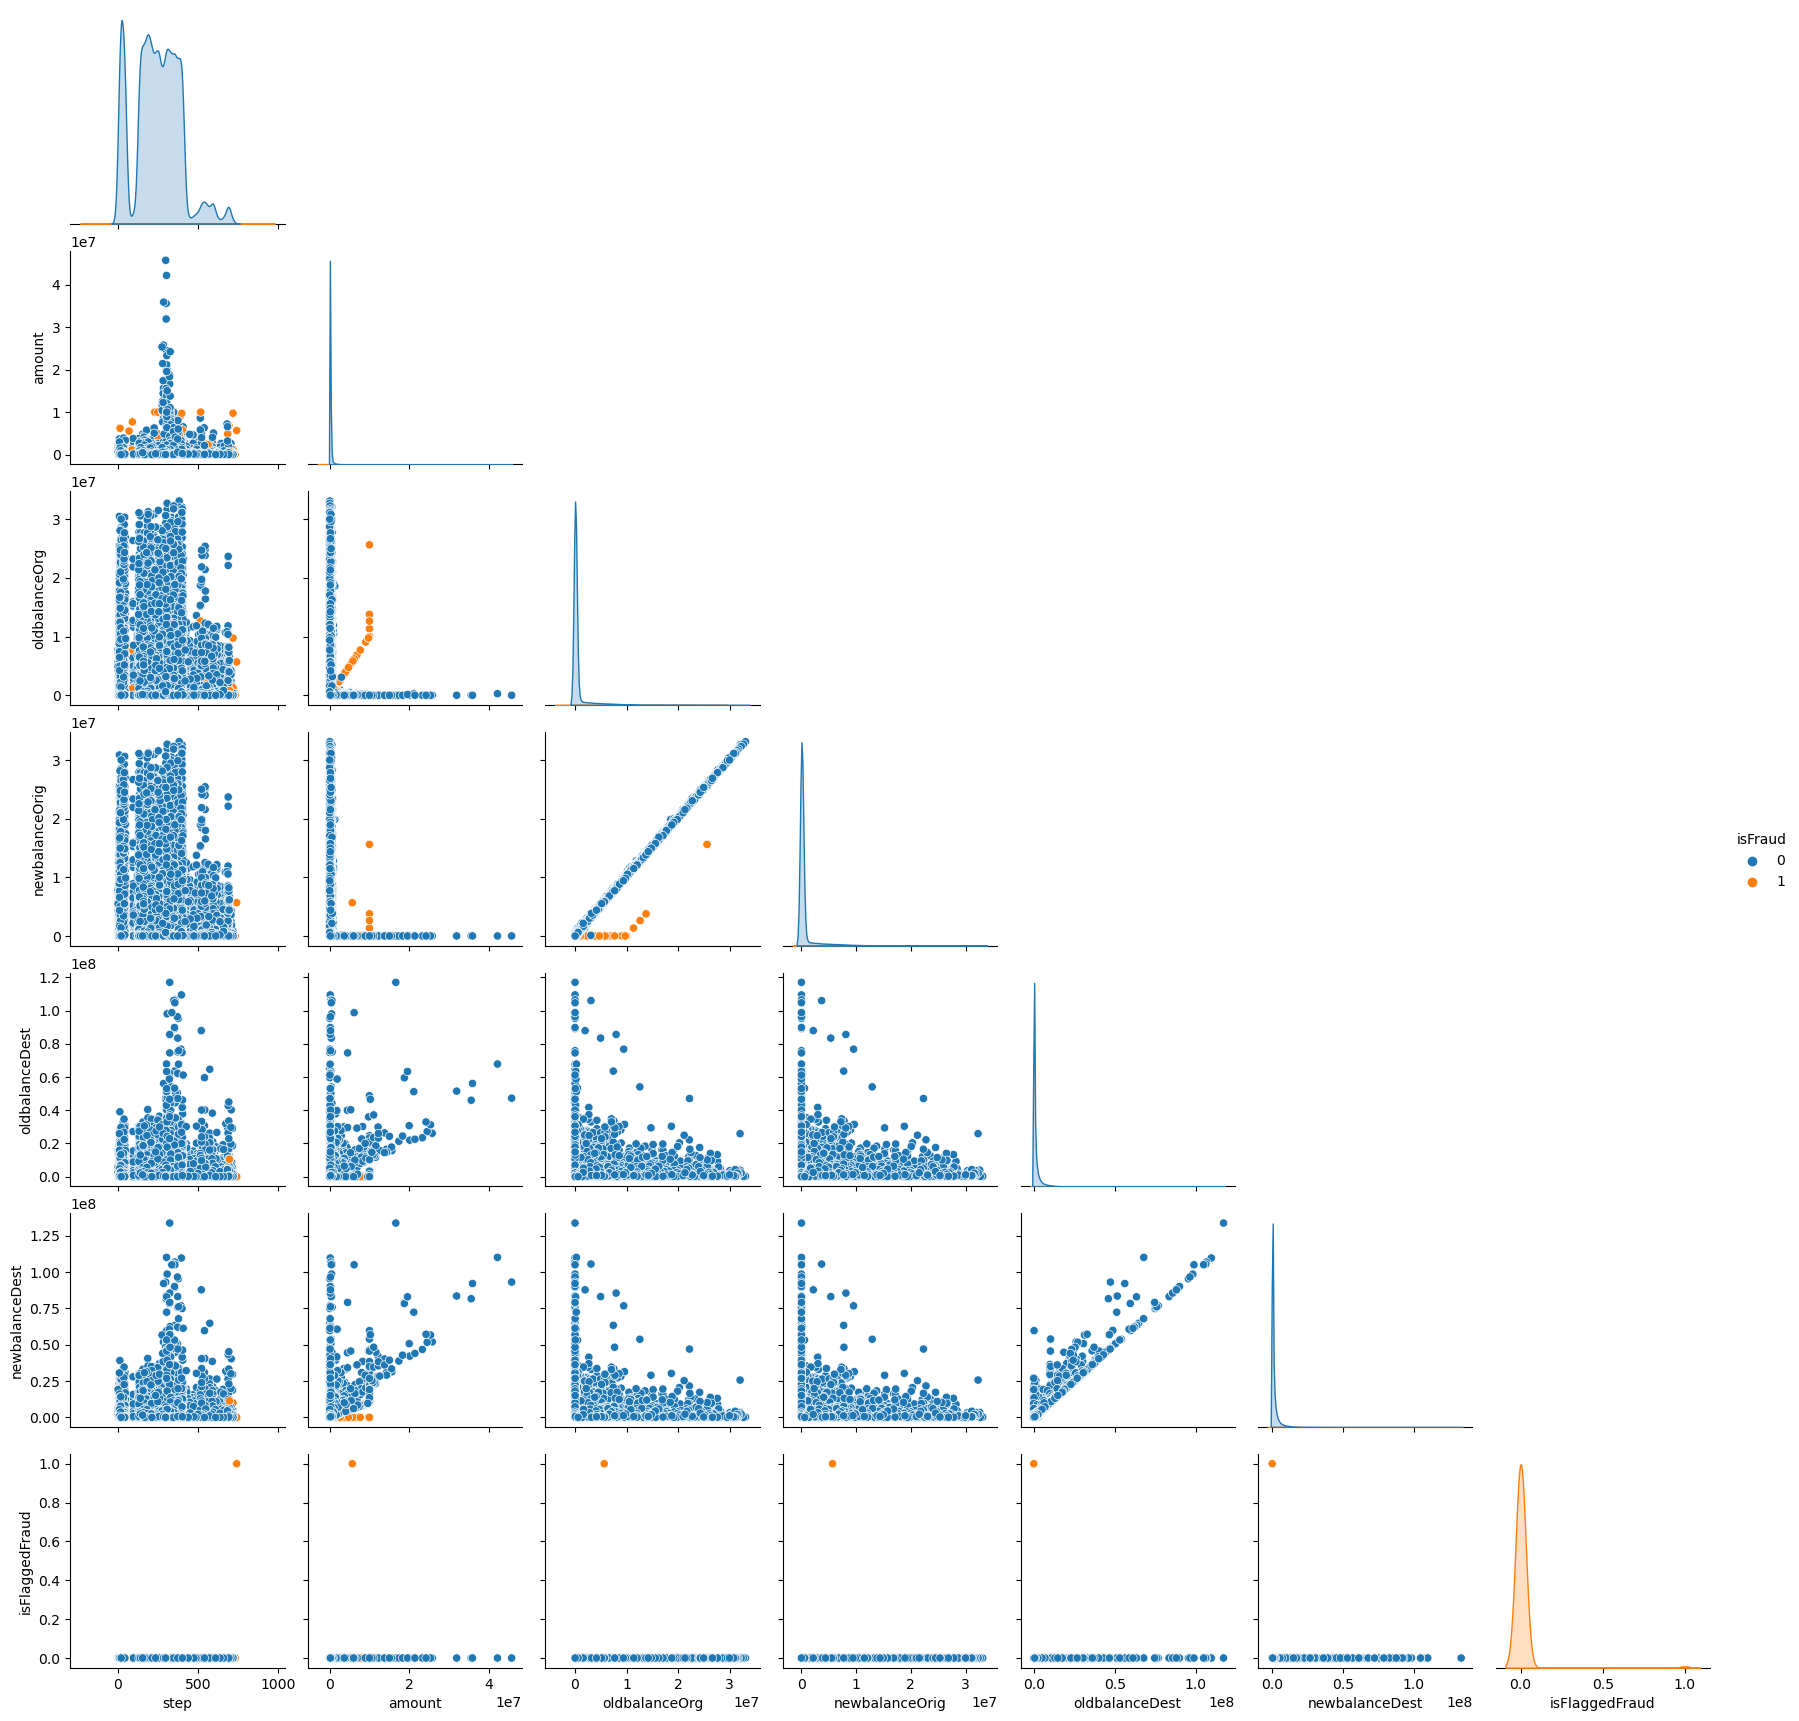

In [12]:
# pairplot
# Based on the description of the columns, isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
# So, "isFraud" should be the target
sns.pairplot(sample, corner=True, hue='isFraud')

In [13]:
#oldbalanceOrg - initial balance before the transaction
# newbalanceOrig - new balance after the transaction

#All the transactions being fraud are having much lower newbalanceOrig compare to oldbalanceOrg, which is obviously the case for Fraudulent transactions

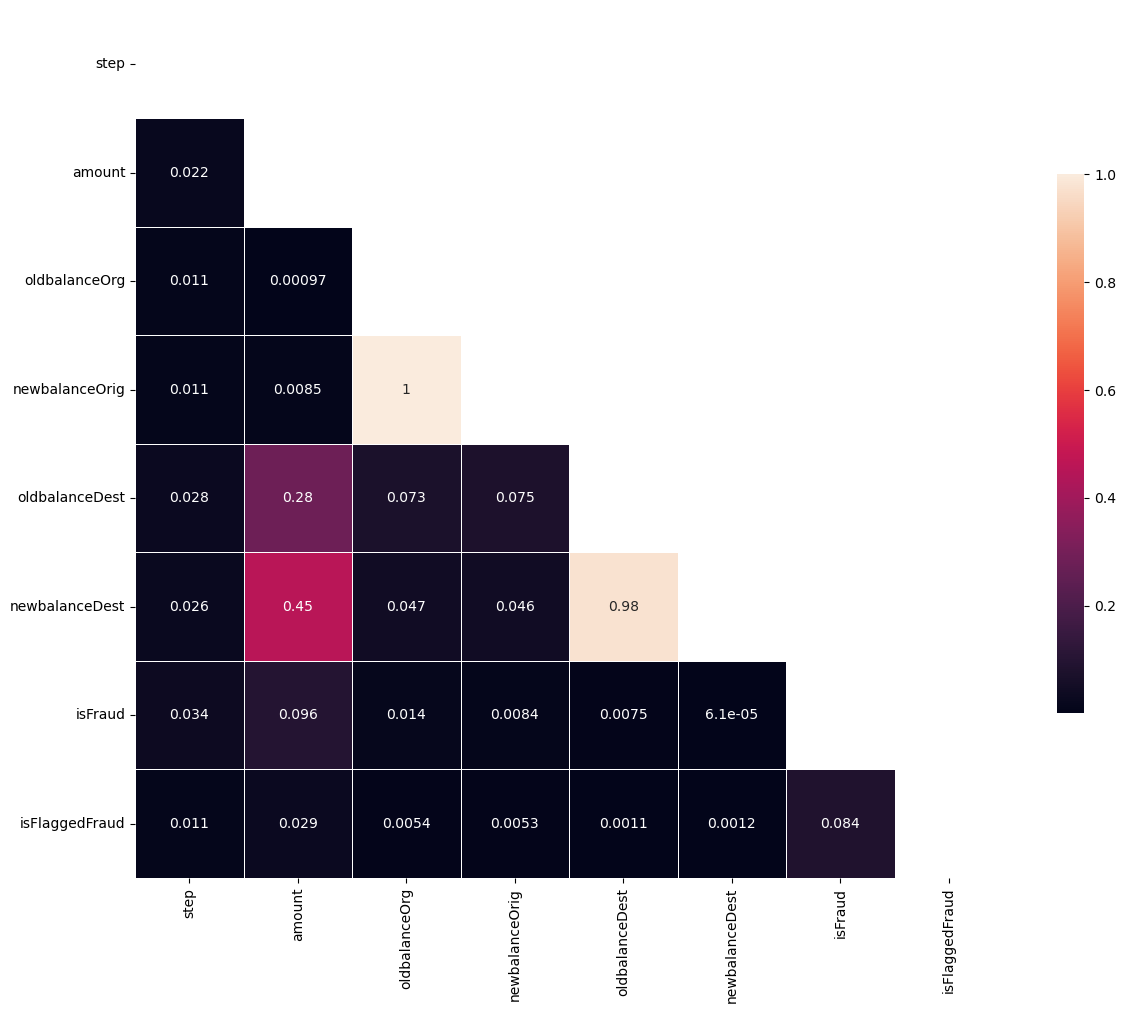

In [14]:
# Correlation matrix
numeric_columns = sample.select_dtypes(include=np.number).columns
corr = np.abs(sample[numeric_columns].corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [15]:
# newbalanceOrig and oldbalanceOrg have duplicate information, which is also seen in the correlation matrix plot as they are extremly highly correlated. We'll drop newbalanceOrg
# Same reason for dropping newbalanceDest
# because the column "isFlaggedFraud" is based on a business model, and does not help us in building new models, it will also be dropped
# perform it on both dataframe "transaction" and "sample"

transaction.drop(columns= ['isFlaggedFraud', 'newbalanceOrig', 'newbalanceDest'], inplace = True)
sample.drop(columns= ['isFlaggedFraud', 'newbalanceOrig', 'newbalanceDest'], inplace = True)

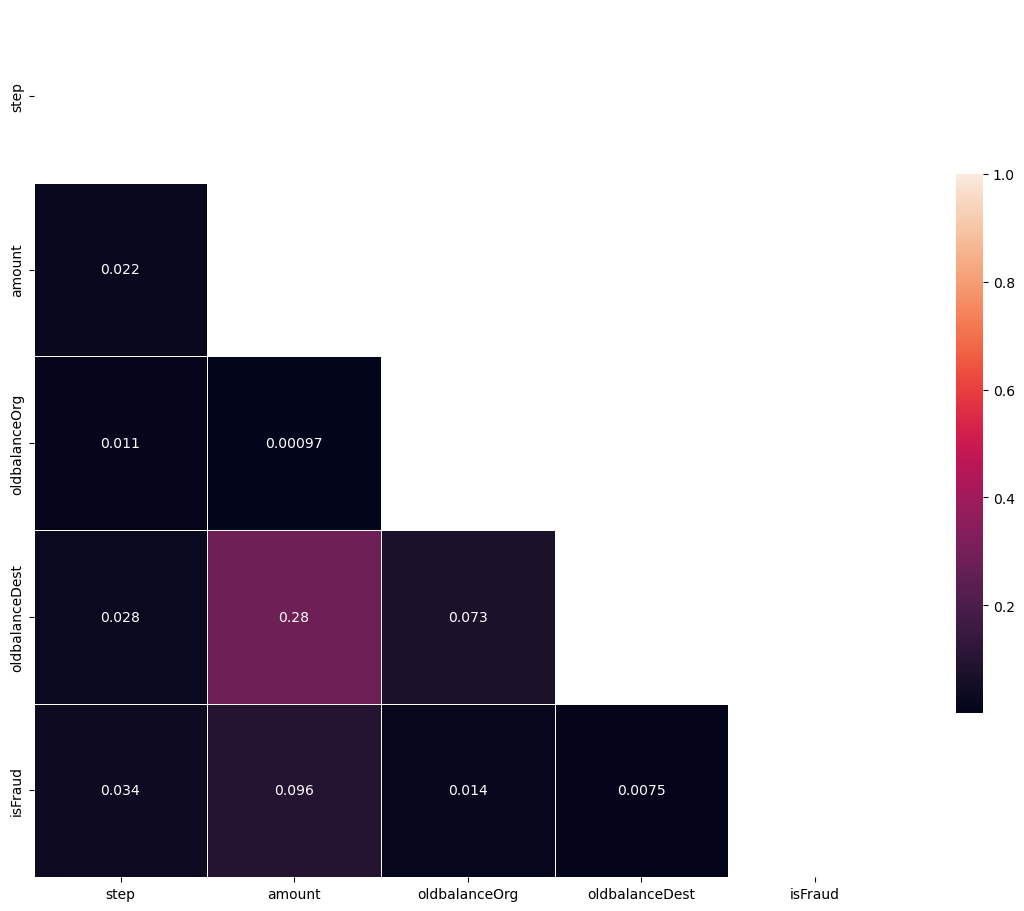

In [16]:
# Let's see the correlation matrix plot again
numeric_columns = sample.select_dtypes(include=np.number).columns
corr = np.abs(sample[numeric_columns].corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

# Looks pretty good

c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ruoxi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

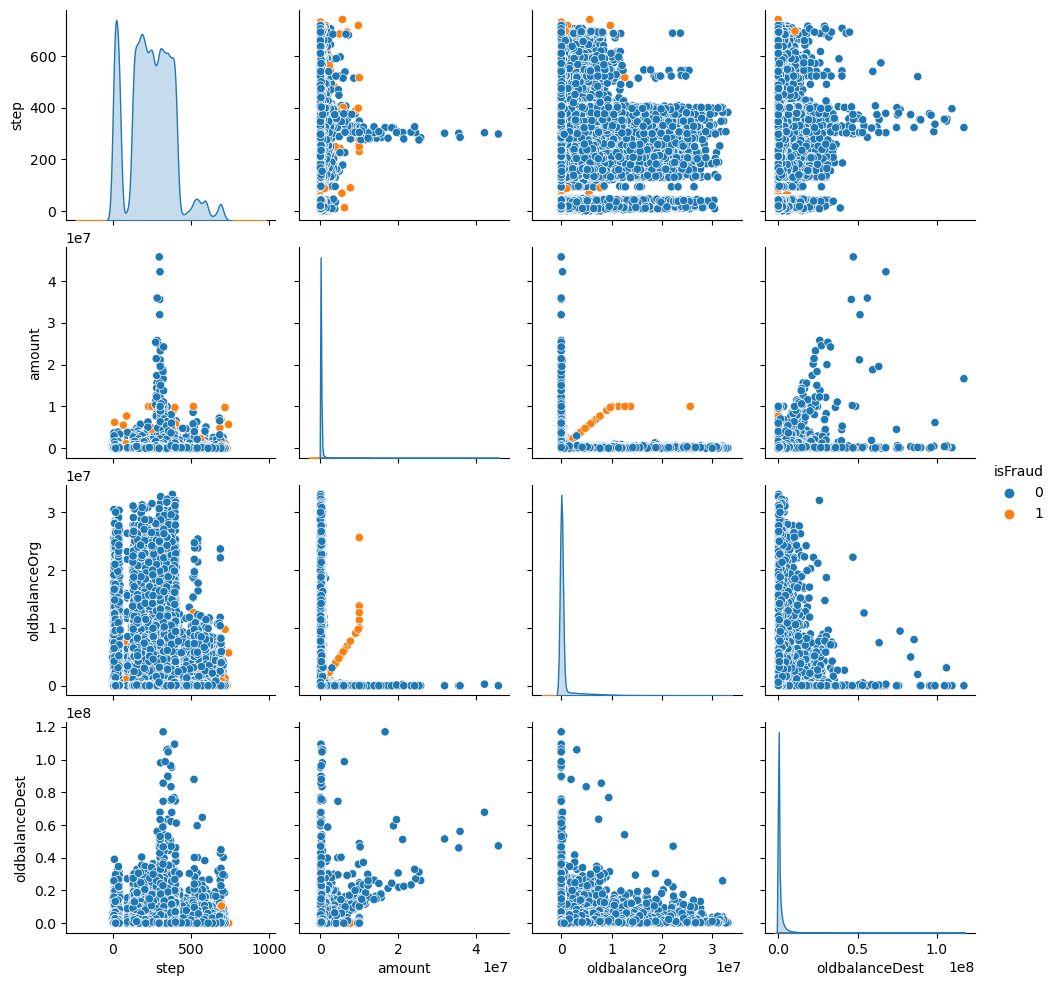

In [17]:
sns.pairplot(sample, hue='isFraud')

Text(0.5, 1.0, 'Data distribution for step')

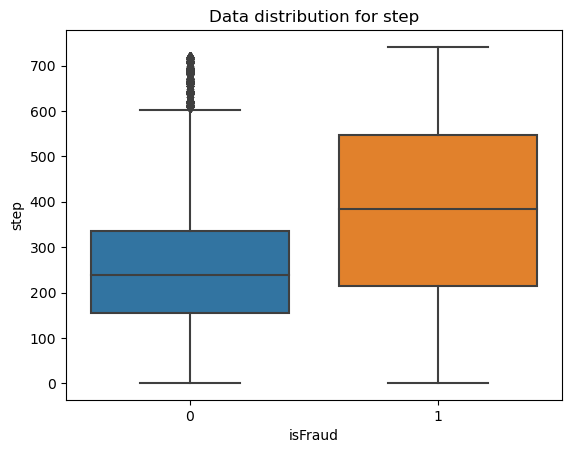

In [18]:
sns.boxplot(data=sample, x= 'isFraud', y='step')
plt.title('Data distribution for step')

Text(0.5, 1.0, 'Data distribution for amount')

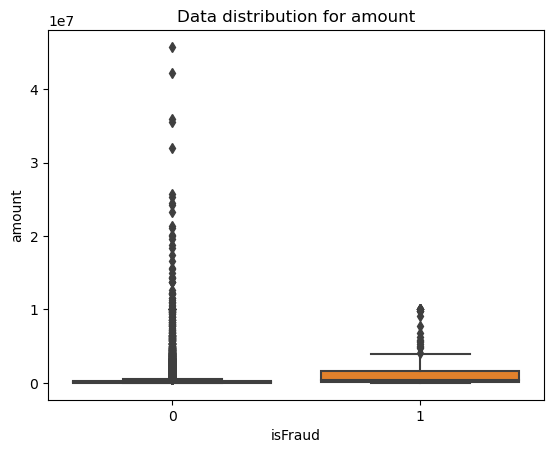

In [19]:
sns.boxplot(data=sample, x= 'isFraud', y='amount')
plt.title('Data distribution for amount')

Text(0.5, 1.0, 'Data distribution for type')

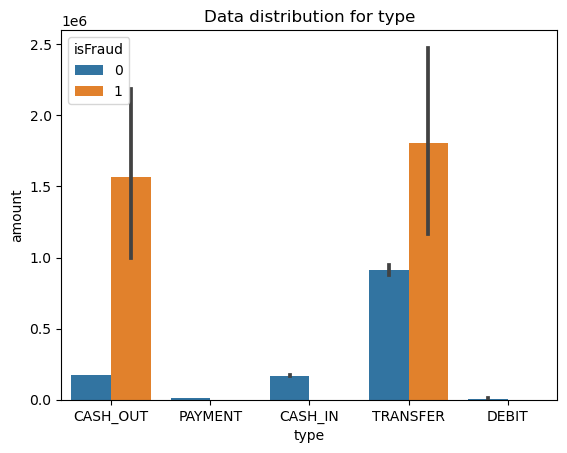

In [20]:
sns.barplot(data=sample, x= 'type', y='amount', hue="isFraud")
plt.title('Data distribution for type')

### What is the distribution of the outcome? 

In [21]:
# Your response here
'''
The "amount" of transaction does not necessary indicate the fraudulent behavior as the transactions labeled as "isFraud" has a ceiling around 1le7
the "step" is ralatively higher for the fraudelent transactions
The fraudulent transactions happen in CASH_OUT and TRANSFER'''

'\nThe "amount" of transaction does not necessary indicate the fraudulent behavior as the transactions labeled as "isFraud" has a ceiling around 1le7\nthe "step" is ralatively higher for the fraudelent transactions\nThe fraudulent transactions happen in CASH_OUT and TRANSFER'

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [22]:
# check the columns again
transaction.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'nameDest',
       'oldbalanceDest', 'isFraud'],
      dtype='object')

In [23]:
sample.groupby('nameDest')['amount'].agg('mean').sort_values(ascending=False)

nameDest
C1406193485    35898999.64
C1947242643    35577062.04
C753526445     31922442.33
C1512993148    25346513.97
C86023156      24223624.57
                  ...     
M1086019246           3.56
M1635303245           3.06
M874965077            2.75
M1953156491           1.88
M447775082            1.03
Name: amount, Length: 92871, dtype: float64

In [24]:
# We can see that the "nameDest" should indicate if this recepient is having a fraudulent transaction

In [25]:
# Your code here
#"nameOrig" can be dropped, "nameDest" is useful
transaction.drop(columns = ['nameOrig'], inplace=True)
sample.drop(columns = ['nameOrig'], inplace=True)


In [26]:
# Set the display format to suppress scientific notation
pd.options.display.float_format = '{:.3f}'.format
transaction.describe()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud
count,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000
mean,243.397,179861.904,833883.104,1100701.667,0.001
std,142.332,603858.231,2888242.673,3399180.113,0.036
min,1.000,0.000,0.000,0.000,0.000
25%,156.000,13389.570,0.000,0.000,0.000
50%,239.000,74871.940,14208.000,132705.665,0.000
75%,335.000,208721.478,107315.175,943036.708,0.000
max,743.000,92445516.640,59585040.370,356015889.350,1.000


In [27]:
#"step", " amount", "type", 'oldbalanceOrg', 'nameDest','oldbalanceDest' will be kept for now as the potential independent variables

In [28]:
# First one-hot encoding on "type"
encoded_type = pd.get_dummies(sample['type'], prefix='type', drop_first=True)

In [29]:
sample =pd.concat([sample, encoded_type], axis =1)

In [30]:
# drop "type"
sample.drop(columns=['type'], inplace=True)

In [31]:
sample.head()

,step,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1357114,138,157548.740,41.000,C1410204448,0.000,0,True,False,False,False
1741821,161,612.360,0.000,M750820911,0.000,0,False,False,True,False
5332908,374,32010.440,3950563.780,C922502124,7560073.530,0,False,False,False,False
5398911,377,15188.340,922.000,M1218715527,0.000,0,False,False,True,False
5223348,370,9771.360,10223.340,M2028882426,0.000,0,False,False,True,False


### Run a logisitc regression classifier and evaluate its accuracy.

In [32]:
# Your code here
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample[['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'type_CASH_OUT','type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']], sample['isFraud'], test_size=0.25, random_state=10)


In [33]:
# As we have seen before, the data are imbalanced, and there are too few fraudulent transactions
# Therefore, we use SMOTE method to resample the training data

In [34]:
!pip install --user --upgrade scikit-learn
!pip install --user --upgrade imbalanced-learn


from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [35]:
#standardization on 'step', 'amount', 'oldbalanceOrg', 'oldbalanceDest'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train_resampled)
y_pred = lr.predict(X_test_scaled)
print('The accuracy score of the logistic regression model on the training dataset is:', lr.score(X_train_scaled, y_train_resampled))
print('The accuracy score of the logistic regression model on the testing dataset is:', lr.score(X_test_scaled, y_test))
print('The recall score of the logistic regression model on the testing dataset is:', recall_score(y_pred, y_test))
print('The precision score of the logistic regression model on the testing dataset is:', precision_score(y_pred, y_test))

The accuracy score of the logistic regression model on the training dataset is: 0.929808398424461
The accuracy score of the logistic regression model on the testing dataset is: 0.93196
The recall score of the logistic regression model on the testing dataset is: 0.018529241459177764
The precision score of the logistic regression model on the testing dataset is: 0.8421052631578947


In [37]:
'''The accuracy score for the testing dataset is about 0.93, and there's no sign of overfitting the model;
the precision score is about 0.84, but the recall score is extremly low, which means it's very likely to flag the fraudulent transactions as safe regular transactions'''

"The accuracy score for the training dataset is higher than the testing dataset;\nthe precision score is pretty high, but the recall score is extremly low, which means it's very likely to flag the fraudulent transactions as safe regular transactions"

In [40]:
lr.coef_

array([[ 0.79656829, -3.88390653, 12.81801657, -0.12861064, 54.81508043,
        -0.66196422, -3.80242928, 54.97197049]])

### Now pick a model of your choice and evaluate its accuracy.

In [38]:
# Your code here
'''Reducing the independent varibales on Logistic Regression model: Based on the logistic regression model, we can try to reduce the independent variables to 
'step', 'amount', 'oldbalanceDest', 'type_CASH_OUT','type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'
'''

"Reducing the independent varibales on Logistic Regression model: Based on the logistic regression model, we can try to reduce the independent variables to \n'step', 'amount', 'oldbalanceDest', 'type_CASH_OUT','type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'\n"

In [43]:
# drop the column "oldbalanceOrg" from X_train_resampled and X_test
X_train_2 = X_train_resampled.drop(columns=['oldbalanceOrg'])
X_test_2 = X_test.drop(columns=['oldbalanceOrg'])
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2= scaler.transform(X_test_2)
lr_2 = LogisticRegression()
lr_2.fit(X_train_scaled_2, y_train_resampled)
y_pred = lr_2.predict(X_test_scaled_2)
print('The accuracy score of the logistic regression model on the training dataset is:', lr_2.score(X_train_scaled_2, y_train_resampled))
print('The accuracy score of the logistic regression model on the testing dataset is:', lr_2.score(X_test_scaled_2, y_test))
print('The recall score of the logistic regression model on the testing dataset is:', recall_score(y_pred, y_test))
print('The precision score of the logistic regression model on the testing dataset is:', precision_score(y_pred, y_test))

The accuracy score of the logistic regression model on the training dataset is: 0.8875025035049069
The accuracy score of the logistic regression model on the testing dataset is: 0.88452
The recall score of the logistic regression model on the testing dataset is: 0.010312822275696116
The precision score of the logistic regression model on the testing dataset is: 0.7894736842105263


In [ ]:
'''By removing the variable oldbalanceOrg, every score is lower
Next, we try to remove the oldbalanceDest'''

In [44]:
X_train_3 = X_train_resampled.drop(columns=['oldbalanceOrg', 'oldbalanceDest'])
X_test_3 = X_test_2.drop(columns=['oldbalanceDest'])
scaler = StandardScaler()
X_train_scaled_3 = scaler.fit_transform(X_train_3)
X_test_scaled_3 = scaler.transform(X_test_3)
lr_3 = LogisticRegression()
lr_3.fit(X_train_scaled_3, y_train_resampled)
y_pred = lr_3.predict(X_test_scaled_3)
print('The accuracy score of the logistic regression model on the training dataset is:', lr_3.score(X_train_scaled_3, y_train_resampled))
print('The accuracy score of the logistic regression model on the testing dataset is:', lr_3.score(X_test_scaled_3, y_test))
print('The recall score of the logistic regression model on the testing dataset is:', recall_score(y_pred, y_test))
print('The precision score of the logistic regression model on the testing dataset is:', precision_score(y_pred, y_test))

The accuracy score of the logistic regression model on the training dataset is: 0.8928299619467254
The accuracy score of the logistic regression model on the testing dataset is: 0.89568
The recall score of the logistic regression model on the testing dataset is: 0.011406844106463879
The precision score of the logistic regression model on the testing dataset is: 0.7894736842105263


In [ ]:
'''It's really not improved compared to the first logistic regression model;
Next, we try KNN to see if this makes any difference'''

In [45]:
X_train_resampled

,step,amount,oldbalanceOrg,oldbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,402,97465.640,20601.000,0.000,False,False,False,False
1,329,11083.260,0.000,0.000,False,False,True,False
2,139,107790.070,51486.000,1186591.100,True,False,False,False
3,156,339813.700,5972.000,386078.190,True,False,False,False
4,278,2827.790,5139.000,0.000,False,False,True,False
...,...,...,...,...,...,...,...,...
149785,609,43904.532,43904.532,0.000,True,False,False,True
149786,337,1624547.394,1624547.394,0.000,False,False,False,True
149787,485,292037.501,292037.501,0.000,False,False,False,True
149788,440,4252866.906,4252866.906,106745.131,True,False,False,False


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
knnc.fit(X_train_scaled, y_train_resampled)
y_pred = knnc.predict(X_test_scaled)
print('The accuracy score of the KNN classifier model on the training dataset is:', knnc.score(X_train_scaled, y_train_resampled))
print('The accuracy score of the KNN classifier model on the testing dataset is:', knnc.score(X_test_scaled, y_test))
print('The recall score of the KNN classifier model on the testing dataset is:', recall_score(y_pred, y_test))
print('The precision score of the KNN classifier model on the testing dataset is:', precision_score(y_pred, y_test))


The accuracy score of the KNN classifier model on the training dataset is: 0.9940850524067028
The accuracy score of the KNN classifier model on the testing dataset is: 0.9856
The recall score of the KNN classifier model on the testing dataset is: 0.08290155440414508
The precision score of the KNN classifier model on the testing dataset is: 0.8421052631578947


Logistic Regression model gives precision score 0.84, and R2 score 0.93
KNN Classifier gives the same precision score 0.84, higher R2 score 0.99, and higher recall score(although it is still very low)
The model KNN Classifier IMPROVES the performance
Next we check Extreme Gradient Boosting

### Which model worked better and how do you know?

In [47]:
# Your response here
!pip install xgboost

import xgboost

xgb_c = xgboost.XGBClassifier(objective='binary:logistic', random_state=10)
xgb_c.fit(X_train_scaled, y_train_resampled)
y_pred = xgb_c.predict(X_test_scaled)
print('The accuracy score of the XGB classifier model on the training dataset is:', xgb_c.score(X_train_scaled, y_train_resampled))
print('The accuracy score of the XGB classifier model on the testing dataset is:', xgb_c.score(X_test_scaled, y_test))
print('The recall score of the XGB classifier model on the testing dataset is:', recall_score(y_pred, y_test))
print('The precision score of the XGB classifier model on the testing dataset is:', precision_score(y_pred, y_test))

The accuracy score of the XGB classifier model on the training dataset is: 0.999532679084051
The accuracy score of the XGB classifier model on the testing dataset is: 0.99656
The recall score of the XGB classifier model on the testing dataset is: 0.2777777777777778
The precision score of the XGB classifier model on the testing dataset is: 0.7894736842105263


In [53]:
xgb_c.feature_importances_

array([0.00543897, 0.0293834 , 0.04206098, 0.00810274, 0.15350822,
       0.        , 0.01032207, 0.7511836 ], dtype=float32)

This xgboost model without "nameDEST" increases the R2 Score to over 0.99, and also improved the recall score a bit, but the precision score is lower than 0.84

In [48]:
# As we have seen before, the "nameDest" should also be independent variable, we'll do target encoding
# First we split the train test data by including the varible "nameDest"
X_train, X_test, y_train, y_test = train_test_split(sample[['step', 'amount', 'oldbalanceOrg','nameDest', 'oldbalanceDest', 'type_CASH_OUT','type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']], sample['isFraud'], test_size=0.25, random_state=10)


In [50]:
# creating a new column "avg_amount_nameDest"
avg_amount_nameDest = X_train.groupby('nameDest')['amount'].agg('mean').to_dict()

In [51]:
X_train['avg_amount_nameDest'] = X_train['nameDest'].replace(avg_amount_nameDest)
X_train.head()

C:\Users\ruoxi\AppData\Local\Temp\ipykernel_22408\4016573750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['avg_amount_nameDest'] = X_train['nameDest'].replace(avg_amount_nameDest)


,step,amount,oldbalanceOrg,nameDest,oldbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,avg_amount_nameDest
5828874,402,97465.640,20601.000,C35538645,0.000,False,False,False,False,97465.640
4619307,329,11083.260,0.000,M1296059679,0.000,False,False,True,False,11083.260
1426054,139,107790.070,51486.000,C1939255087,1186591.100,True,False,False,False,154414.540
1601460,156,339813.700,5972.000,C1526507740,386078.190,True,False,False,False,182637.215
3719764,278,2827.790,5139.000,M727457157,0.000,False,False,True,False,2827.790


In [61]:
# transform and add the column on the X_test
# Create a function to apply to 'nameDest' column
def get_avg_amount(x):
    if x in avg_amount_nameDest:
        return avg_amount_nameDest[x]
    else:
        return pd.Series(list(avg_amount_nameDest.values())).mean()
    
X_test['avg_amount_nameDest'] = X_test['nameDest'].apply(get_avg_amount)

In [63]:
avg_amount_nameDest

{'C1000070008': 506267.46,
 'C1000094209': 208454.25,
 'C1000104864': 91550.37,
 'C1000113023': 66528.86,
 'C1000124976': 149465.74,
 'C1000151306': 256657.61,
 'C1000156006': 309620.63,
 'C1000219612': 497664.86,
 'C1000242744': 137329.45,
 'C10002438': 1450.73,
 'C100024863': 40559.16,
 'C100028684': 560167.31,
 'C1000312792': 319165.985,
 'C1000351574': 850.73,
 'C1000352977': 10777.49,
 'C1000443884': 67150.6,
 'C100045266': 109704.65,
 'C1000469870': 305119.41,
 'C100048421': 99500.79,
 'C1000585264': 157502.79,
 'C1000596742': 223951.75,
 'C1000610515': 2256666.74,
 'C1000649398': 137280.69,
 'C1000656618': 111671.52,
 'C1000691040': 216134.96,
 'C1000726834': 149272.17,
 'C1000740183': 197543.71,
 'C100082037': 119042.02,
 'C1000878520': 288266.58,
 'C1000902358': 182884.65,
 'C1000910565': 822983.5,
 'C1000945338': 153334.17,
 'C1000966905': 18545.26,
 'C1001170585': 63622.67,
 'C1001175213': 178423.7,
 'C1001181764': 8817.6,
 'C1001315820': 273238.96,
 'C1001347804': 143908.15

In [64]:
X_test.head()

,step,amount,oldbalanceOrg,nameDest,oldbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,avg_amount_nameDest,avg_step_nameDest
4465826,324,115018.120,80736.000,C767090742,0.000,True,False,False,False,175209.485,C767090742
5407432,378,167146.390,37334.000,C1560090084,0.000,False,False,False,True,175209.485,C1560090084
5310999,373,263000.070,0.000,C1405664343,943176.240,True,False,False,False,175209.485,C1405664343
3077525,235,16978.450,0.000,C1463071776,10846498.220,True,False,False,False,119767.960,33.000
3161488,237,47330.520,0.000,M1250513782,0.000,False,False,True,False,175209.485,M1250513782


In [54]:
#also add a new column "avg_step_nameDest"
avg_step_nameDest = X_train.groupby('nameDest')['step'].agg('mean').to_dict()
X_train['avg_step_nameDest'] = X_train['nameDest'].replace(avg_step_nameDest)

C:\Users\ruoxi\AppData\Local\Temp\ipykernel_22408\1671748478.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['avg_step_nameDest'] = X_train['nameDest'].replace(avg_step_nameDest)


In [65]:
# same on the X_test
def get_avg_step(x):
    if x in avg_step_nameDest:
        return avg_step_nameDest[x]
    else:
        return pd.Series(list(avg_step_nameDest.values())).mean()
    
X_test['avg_step_nameDest'] = X_test['nameDest'].apply(get_avg_step)

In [66]:
X_test.head()

,step,amount,oldbalanceOrg,nameDest,oldbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,avg_amount_nameDest,avg_step_nameDest
4465826,324,115018.120,80736.000,C767090742,0.000,True,False,False,False,175209.485,246.845
5407432,378,167146.390,37334.000,C1560090084,0.000,False,False,False,True,175209.485,246.845
5310999,373,263000.070,0.000,C1405664343,943176.240,True,False,False,False,175209.485,246.845
3077525,235,16978.450,0.000,C1463071776,10846498.220,True,False,False,False,119767.960,33.000
3161488,237,47330.520,0.000,M1250513782,0.000,False,False,True,False,175209.485,246.845


In [67]:
#drop the column "nameDest"
X_train_new = X_train.drop(columns= ['nameDest'])
X_test_new = X_test.drop(columns=['nameDest'])

In [68]:
X_test_new.head()

,step,amount,oldbalanceOrg,oldbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,avg_amount_nameDest,avg_step_nameDest
4465826,324,115018.120,80736.000,0.000,True,False,False,False,175209.485,246.845
5407432,378,167146.390,37334.000,0.000,False,False,False,True,175209.485,246.845
5310999,373,263000.070,0.000,943176.240,True,False,False,False,175209.485,246.845
3077525,235,16978.450,0.000,10846498.220,True,False,False,False,119767.960,33.000
3161488,237,47330.520,0.000,0.000,False,False,True,False,175209.485,246.845


In [69]:
#redo the resampling and scaling
smote = SMOTE(random_state=10)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_new, y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_new)

In [70]:
xgb_c_new = xgboost.XGBClassifier(objective='binary:logistic', random_state=10)
xgb_c_new.fit(X_train_scaled, y_train_resampled)
y_pred = xgb_c_new.predict(X_test_scaled)
print('The accuracy score of the XGB classifier model on the training dataset is:', xgb_c_new.score(X_train_scaled, y_train_resampled))
print('The accuracy score of the XGB classifier model on the testing dataset is:', xgb_c_new.score(X_test_scaled, y_test))
print('The recall score of the XGB classifier model on the testing dataset is:', recall_score(y_pred, y_test))
print('The precision score of the XGB classifier model on the testing dataset is:', precision_score(y_pred, y_test))

The accuracy score of the XGB classifier model on the training dataset is: 0.9995794111756459
The accuracy score of the XGB classifier model on the testing dataset is: 0.99876
The recall score of the XGB classifier model on the testing dataset is: 0.6
The precision score of the XGB classifier model on the testing dataset is: 0.5526315789473685


Recall score increases dramatically after the encoding on "nameDest" to 0.6, R2 score maintains on the high level as over 0.99, but the precision score decreases to 0.55
Let's try hyperparameter tuning

In [72]:
# Define the hyperparameter grid to search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_leaf_nodes': [20, 40, 80],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
xgb_classifier= xgboost.XGBClassifier(objective='binary:logistic', random_state=10)
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=5)
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

c:\Users\ruoxi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:05:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


In [74]:
best_model.feature_importances_

array([0.00554167, 0.03319223, 0.04452743, 0.00825723, 0.14587025,
       0.        , 0.03838852, 0.7102505 , 0.00851139, 0.00546081],
      dtype=float32)

In [75]:
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 7,
 'max_leaf_nodes': 20,
 'n_estimators': 200,
 'subsample': 1.0}

In [76]:
y_pred = best_model.predict(X_test_scaled)
print('The accuracy score of the XGB classifier model on the training dataset is:', best_model.score(X_train_scaled, y_train_resampled))
print('The accuracy score of the XGB classifier model on the testing dataset is:', best_model.score(X_test_scaled, y_test))
print('The recall score of the XGB classifier model on the testing dataset is:', recall_score(y_pred, y_test))
print('The precision score of the XGB classifier model on the testing dataset is:', precision_score(y_pred, y_test))

The accuracy score of the XGB classifier model on the training dataset is: 0.9999332398691502
The accuracy score of the XGB classifier model on the testing dataset is: 0.999
The recall score of the XGB classifier model on the testing dataset is: 0.696969696969697
The precision score of the XGB classifier model on the testing dataset is: 0.6052631578947368


In [77]:
## what if we increase the max_depth, n_estimators, learning_rate

param_grid = {
    'n_estimators': [200, 250, 300],
    'learning_rate': [0.2, 0.5, 0.8],
    'max_leaf_nodes': [20, 40, 80],
    'max_depth': [7, 10, 15],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
xgb_classifier= xgboost.XGBClassifier(objective='binary:logistic', random_state=10)
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=5)
grid_search.fit(X_train_scaled, y_train_resampled)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
print('The accuracy score of the XGB classifier model on the training dataset is:', best_model.score(X_train_scaled, y_train_resampled))
print('The accuracy score of the XGB classifier model on the testing dataset is:', best_model.score(X_test_scaled, y_test))
print('The recall score of the XGB classifier model on the testing dataset is:', recall_score(y_pred, y_test))
print('The precision score of the XGB classifier model on the testing dataset is:', precision_score(y_pred, y_test))

c:\Users\ruoxi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:31:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)


The accuracy score of the XGB classifier model on the training dataset is: 1.0
The accuracy score of the XGB classifier model on the testing dataset is: 0.999
The recall score of the XGB classifier model on the testing dataset is: 0.6756756756756757
The precision score of the XGB classifier model on the testing dataset is: 0.6578947368421053


In [78]:
best_model.feature_importances_

array([0.00291116, 0.02163735, 0.02354937, 0.0044791 , 0.09080406,
       0.        , 0.02434943, 0.8240988 , 0.00515086, 0.00301983],
      dtype=float32)

In [79]:
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 15,
 'max_leaf_nodes': 20,
 'n_estimators': 200,
 'subsample': 1.0}

In [82]:
# now we zoom in the intersections and use randomized search
from sklearn.model_selection import RandomizedSearchCV
param_list = {
    'n_estimators': [10, 20, 40, 80, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 300],
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 5, 8, 11, 12, 13, 14, 15, 16],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
xgb_classifier= xgboost.XGBClassifier(objective='binary:logistic', random_state=10)
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_list, n_iter=50, cv=3, scoring='accuracy', n_jobs=15, random_state=10)
random_search.fit(X_train_scaled, y_train_resampled)

# Get the best parameters and the best model
best_params_R = random_search.best_params_
best_model_R = random_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
print('The accuracy score of the XGB classifier model on the training dataset is:', best_model_R.score(X_train_scaled, y_train_resampled))
print('The accuracy score of the XGB classifier model on the testing dataset is:', best_model_R.score(X_test_scaled, y_test))
print('The recall score of the XGB classifier model on the testing dataset is:', recall_score(y_pred, y_test))
print('The precision score of the XGB classifier model on the testing dataset is:', precision_score(y_pred, y_test))

The accuracy score of the XGB classifier model on the training dataset is: 1.0
The accuracy score of the XGB classifier model on the testing dataset is: 0.99888
The recall score of the XGB classifier model on the testing dataset is: 0.6756756756756757
The precision score of the XGB classifier model on the testing dataset is: 0.6578947368421053


In [83]:
best_params_R

{'subsample': 1.0,
 'n_estimators': 180,
 'max_depth': 16,
 'learning_rate': 0.2,
 'colsample_bytree': 0.8}

The model does not improve anymore, therefore, the best model is "best model" with R2 score more than 0.99, precision score more than 0.65, and recall score more than 0.67
Although KNN classifier has more than 0.98 R2 Score, and more than 0.84 precision score, but has very low recall score, and this is not ideal for flagging fraudulent transactions, because we don't want to misflag those transactions as safe 

In [84]:
# Create the pickle files for the model and the encoded dictionaries
import pickle

pickle.dump(best_model, open('model.pkl', 'wb'))
pickle.dump(avg_amount_nameDest, open('avg_amount_nameDest.pkl', 'wb'))
pickle.dump(avg_step_nameDest, open('avg_step_nameDest.pkl', 'wb'))


In [86]:
#create the requirement file
!pip freeze > requirements.txt

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.